In [495]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [498]:
df = pd.read_csv('./data/weather_classification_data.csv')

In [339]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [499]:
target = 'Weather Type'
categorical = ['Cloud Cover', 'Season', 'Location']
numerical = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

In [346]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [347]:
df.describe(exclude="number")

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


In [342]:
df.duplicated().sum()

0

In [343]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

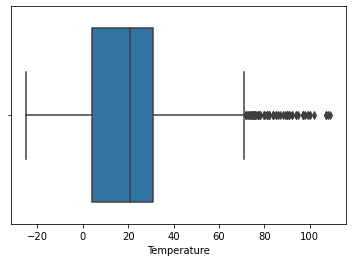

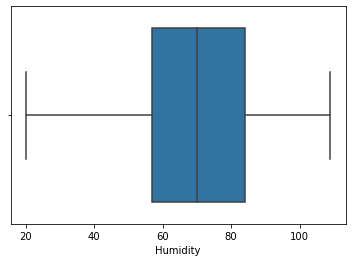

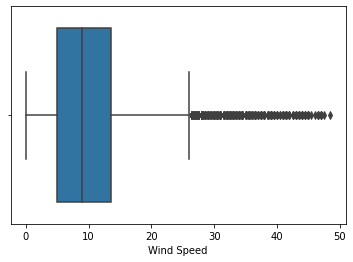

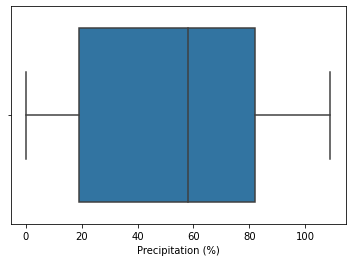

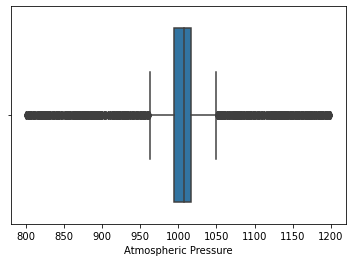

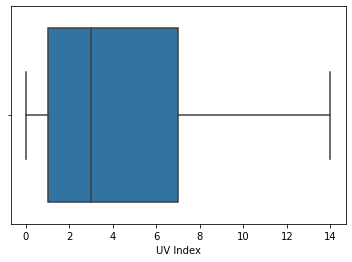

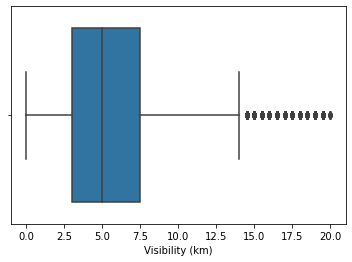

In [350]:
for cols in numerical:
    sns.boxplot(x=df[cols])
    plt.show()

In [500]:
df['Weather Type'] = LabelEncoder().fit_transform(df['Weather Type'])

<AxesSubplot:>

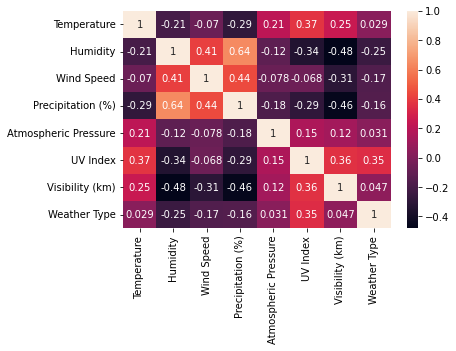

In [353]:
sns.heatmap(df.corr(), annot= True)

In [501]:
X = df.drop(columns= ['Weather Type'], axis=1)
y = df['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [502]:
ss=StandardScaler()
X_train.loc[:,numerical]=ss.fit_transform(X_train.loc[:,numerical])
X_test.loc[:,numerical]=ss.transform(X_test.loc[:,numerical])

In [454]:
oe=OneHotEncoder(sparse=False)
X_train[oe.get_feature_names()]=oe.fit_transform(X_train[categorical])
X_test[oe.get_feature_names()]=oe.transform(X_test[categorical])

/home/ipekguler/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/ipekguler/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [455]:
X_train.drop(columns=categorical, inplace=True)
X_test.drop(columns=categorical, inplace=True)

In [491]:
def model_fit_evaluate(model, parameters, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, parameters, error_score="raise")
    grid.fit(X_train, y_train)
    #print(grid.best_estimator_, grid.best_params_)
    
    pred = grid.predict(X_test)
    
    print("classification report for ", model, ":\n", classification_report(y_test, pred), "\n\n")

In [496]:
RFC = RandomForestClassifier()
RFC_params = {
    "n_estimators" : np.arange(30,80),
    "max_features": np.arange(1, 18),
    "bootstrap" : [True],
    "oob_score" : [True, False]
}
KNC = KNeighborsClassifier()
KNC_params = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']
}
XGBC = XGBClassifier()
XGBC_params = {
    "max_depth" : np.arange(1,10),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [25, 50, 75, 100, 125]
}

for model, parameters in [[RFC, RFC_params], [KNC, KNC_params], [XGBC, XGBC_params]]:
    model_fit_evaluate(
        model,
        parameters,
        X_train,
        y_train,
        X_test,
        y_test
    )

/home/ipekguler/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ipekguler/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ipekguler/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ipekguler/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_features=2, n_estimators=68) {'bootstrap': True, 'max_features': 2, 'n_estimators': 68, 'oob_score': False}
classification report for  RandomForestClassifier() :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       659
           1       0.89      0.93      0.91       682
           2       0.94      0.93      0.94       664
           3       0.94      0.92      0.93       635

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640
 :


KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance') {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
classification report for  KNeighborsClassifier() :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       659
           1       0.89      0.93      0.91       682
           2  